In [1]:
import csv
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd


In [2]:
def load_data(filename):
    """Load in the yaw data from the csv log

    Parameters:
    filename (str)  -- the name of the csv log

    Returns:
    yaw_data (float list)   -- the logged yaw data
    """
    f = open(filename)

    file_reader = csv.reader(f, delimiter=',')

    # Load data into dictionary with headers as keys
    # Header: Latitude, Longitude, Time Stamp(ms), ...
    # ..., Yaw(degrees), Pitch(degrees), Roll(degrees)
    data = {}
    header = next(file_reader, None)
    for h in header:
        data[h] = []

    for row in file_reader:
        for h, element in zip(header, row):
            data[h].append(float(element))

    f.close()

    yaw_data = data["Yaw(degrees)"]

    return yaw_data

In [3]:
def prediction_step(x_t_prev, sigma_sq_t_prev):
    """Compute the prediction of 1D Kalman Filter

    Parameters:
    x_t_prev        -- the previous state estimate
    sigma_sq_t_prev -- the previous variance estimate

    Returns:
    x_bar_t         -- the predicted state estimate of time t
    sigma_sq_bar_t  -- the predicted variance estimate of time t
    """

    """STUDENT CODE START"""
    x_bar_t = None
    sigma_sq_bar_t = None
    
    return [x_t_prev, sigma_sq_t_prev]
    """STUDENT CODE END"""


In [4]:
def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):
    """Compute the correction of 1D Kalman Filter

    Parameters:
    x_bar_t         -- the predicted state estimate of time t
    z_t             -- the measured state of time t
    sigma_sq_bar_t  -- the predicted variance of time t
    sigma_sq_z      -- the variance of sensor measurement


    Returns:
    x_est_t         -- the filtered state estimate of time t
    sigma_sq_est_t  -- the filtered variance estimate of time t
    """

    """STUDENT CODE START"""
    #x_est_t = None
    #sigma_sq_est_t = None
    
    K_t = sigma_sq_bar_t/(sigma_sq_bar_t + sigma_sq_z)
    x_est_t = x_bar_t + K_t*(z_t - x_bar_t)
    
    sigma_sq_est_t = sigma_sq_bar_t - K_t*sigma_sq_bar_t

    """STUDENT CODE END"""

    return [x_est_t, sigma_sq_est_t]

In [5]:
def wrap_to_360(angle):
    """Wrap angle data to [0, 360]"""
    return (angle + 360) % 360


In [6]:
def wrap_to_360(angle):
    """Wrap angle data to [0, 360]"""
    return (angle + 360) % 360


def plot_yaw(yaw_dict, time_stamps, title=None, xlim=None, ylim=None):
    """Plot yaw data"""
    plt.plot(np.asarray(time_stamps),
             np.array(yaw_dict["measurements"]),
             '.',
             markersize=1)
    plt.plot(np.asarray(time_stamps),
             np.array(yaw_dict["estimates"]),
             '.',
             markersize=1)
    plt.plot(np.asarray(time_stamps),
             np.asarray(yaw_dict["plus_2_stddev"]),
             '.-',
             markersize=1,
             linewidth=0.5)
    plt.plot(np.asarray(time_stamps),
             np.asarray(yaw_dict["minus_2_stddev"]),
             '.-',
             markersize=1,
             linewidth=0.5)
    plt.legend(["Raw Data", "Estimate", "+2$\sigma$", "-2$\sigma$"])
    plt.title(title)
    plt.ylabel("Yaw (Degrees)")
    plt.xlabel("Time (s)")
    plt.xlim(xlim)
    plt.ylim(ylim)


In [7]:
# Read in data
filepath = "./"
filename = "2020-02-08_08_22_47.csv"
yaw_data_stationary = load_data(filepath + filename)

In [8]:
yaw_mean_stat = np.mean(yaw_data_stationary)
yaw_std_stat = np.std(yaw_data_stationary)
yaw_std_stat

1.3876380876299863

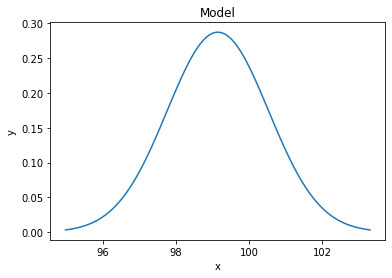

In [9]:
x = np.linspace(yaw_mean_stat - 3*yaw_std_stat, yaw_mean_stat + 3*yaw_std_stat, 100)
plt.plot(x, stats.norm.pdf(x, yaw_mean_stat, yaw_std_stat))
plt.title("Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
#def prediction_step(x_t_prev, sigma_sq_t_prev):
#def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):




Done filtering...plotting...


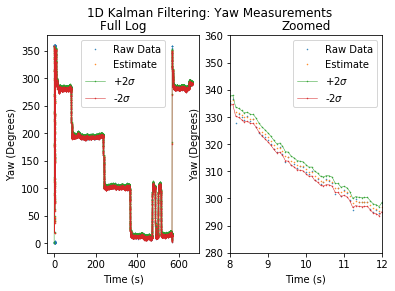

Exiting...


In [11]:
def main(var):
    """Run a 1D Kalman Filter on logged yaw data from a BNO055 IMU."""

    filepath = "./"
    filename = "2020-02-08_08_34_45.csv" # Todo for both data sets
    yaw_data = load_data(filepath + filename)

    """STUDENT CODE START"""
    SENSOR_MODEL_VARIANCE = var
    """STUDENT CODE END"""

    #  Initialize filter
    yaw_dict = {}
    yaw_est_t_prev = yaw_data[0]
    var_t_prev = SENSOR_MODEL_VARIANCE
    yaw_dict["measurements"] = yaw_data
    yaw_dict["estimates"] = []
    yaw_dict["plus_2_stddev"] = []
    yaw_dict["minus_2_stddev"] = []
    time_stamps = []

    #  Run filter over data
    for t, _ in enumerate(yaw_data):
        yaw_pred_t, var_pred_t = prediction_step(yaw_est_t_prev, var_t_prev)

        # To be explicit for teaching purposes, we are getting
        # the measurement with index 't' to show how we get a
        # new measurement each time step. To be more pythonic we could
        # replace the '_' above with 'yaw_meas'
        yaw_meas = yaw_data[t]
        var_z = SENSOR_MODEL_VARIANCE
        
        #def prediction_step(x_t_prev, sigma_sq_t_prev):
        #def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):

        yaw_est_t, var_est_t = correction_step(yaw_pred_t,
                                               yaw_meas,
                                               var_pred_t,
                                               var_z)

        #  Format the printouts
#         sys.stdout.write("Yaw State Estimate: {0}\n\
#                          \rYaw Raw Data:       {1}\
#                          \033[A\r".format(yaw_est_t, yaw_meas))
#         sys.stdout.flush()

        #  Pause the printouts to simulate the real data rate
        dt = 1/13.  # seconds
        time_stamps.append(dt*t)

        #  Comment out sleep to visualize the plot immediately
        # time.sleep(dt)

        #  For clarity sake/teaching purposes, we explicitly update t->(t-1)
        yaw_est_t_prev = yaw_est_t
        var_est_t_prev = var_est_t

        # Pack data away into yaw dictionary for plotting purpose
        plus_2_stddev = wrap_to_360(yaw_est_t + 2*np.sqrt(var_est_t))
        minus_2_stddev = wrap_to_360(yaw_est_t - 2*np.sqrt(var_est_t))

        yaw_dict["estimates"].append(yaw_est_t)
        yaw_dict["plus_2_stddev"].append(plus_2_stddev)
        yaw_dict["minus_2_stddev"].append(minus_2_stddev)

    print("\n\nDone filtering...plotting...")
    
    
    # Plot raw data and estimate
    plt.figure(1)
    plt.suptitle("1D Kalman Filtering: Yaw Measurements")
    plt.subplot(1, 2, 1)
    plot_yaw(yaw_dict, time_stamps, title="Full Log")
    plt.subplot(1, 2, 2)
    plot_yaw(yaw_dict,
             time_stamps,
             title="Zoomed",
             xlim=[8, 12],
             ylim=[280, 360])
    plt.show()

    print("Exiting...")

    return yaw_dict, time_stamps


if __name__ == "__main__":
    yaw_dict, time_stamps = main(yaw_std_stat)


In [12]:
yaw_dict.keys()

dict_keys(['measurements', 'estimates', 'plus_2_stddev', 'minus_2_stddev'])

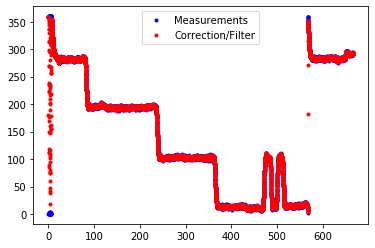

In [13]:
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
plt.legend(['Measurements', 'Correction/Filter'])
plt.show()

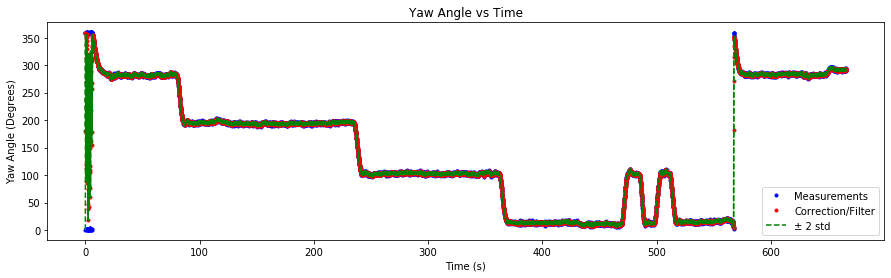

In [14]:
plt.figure(figsize=(15,4))
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
#plt.legend(['Measurements', 'Correction/Filter'])
plt.plot(time_stamps, yaw_dict['plus_2_stddev'], 'g--')
plt.plot(time_stamps, yaw_dict['minus_2_stddev'], 'g--')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (Degrees)')
plt.title('Yaw Angle vs Time')
plt.legend(['Measurements', 'Correction/Filter', '± 2 std'])
plt.show()

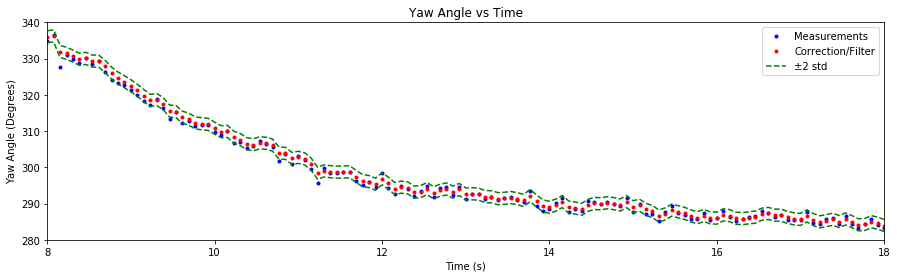

In [15]:
plt.figure(figsize=(15,4))
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
plt.plot(time_stamps, yaw_dict['plus_2_stddev'], 'g--')
plt.plot(time_stamps, yaw_dict['minus_2_stddev'], 'g--')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (Degrees)')
plt.title('Yaw Angle vs Time')
plt.legend(['Measurements', 'Correction/Filter', '±2 std'])
plt.xlim([8, 18])
plt.ylim([280, 340])
plt.show()

## Bayes Filter for Estimating If Vehicle is Stopped

We start by making a speed calc function

In [16]:
def vehicleSpeed(x, y, timestep = 0.5):
    """
    Fuck you
    """
    #assuming x, y are row vectors
    
    #shift the x, y over by one, remove last element
    x_after = np.roll(x, -1)
    x_after = x_after[:-1]
    y_after = np.roll(y, -1)
    y_after = y_after[:-1]
    
    #cut off last element of x and y
    x = x[:-1]
    y = y[:-1]
    
    speed = np.sqrt(np.square(x - x_after) + np.square(y - y_after))/timestep
    
    return speed

In [17]:
#test - expect to see all 1's
a = np.arange(10)
b  = np.zeros(10)
vehicleSpeed(a, b, 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
#loading in all data
df = pd.read_excel("E205_Lab2_NuScenesData.xlsx")

In [93]:
#defining varialbes for all needed data
x_ego = df["X_ego"].to_numpy()
y_ego = df["Y_ego"].to_numpy()
x_v4 = df["X_4"].dropna().to_numpy()
y_v4 = df["Y_4"].dropna().to_numpy()
x_v1 = df["X_1"].dropna().to_numpy()
y_v1 = df["Y_1"].dropna().to_numpy()
x_v2 = df["X_2"].dropna().to_numpy()
y_v2 = df["Y_2"].dropna().to_numpy()
x_v3 = df["X_3"].dropna().to_numpy()
y_v3 = df["Y_3"].dropna().to_numpy()
x_v5 = df["X_5"].dropna().to_numpy()
y_v5 = df["Y_5"].dropna().to_numpy()
x_v6 = df["X_6"].dropna().to_numpy()
y_v6 = df["Y_6"].dropna().to_numpy()
timestep = 0.5

Now we go about calculating the distrubution for the stopped vehicle

In [20]:
speed_v4 = vehicleSpeed(x_v4, y_v4)
speed_v4

array([0.06648308, 0.06365532, 0.        , 0.02262742, 0.02126029,
       0.02262742, 0.08772685, 0.08772685, 0.08772685, 0.03394113,
       0.03255764, 0.03255764, 0.03394113, 0.03394113, 0.03255764,
       0.02262742, 0.02126029, 0.02262742, 0.1754537 , 0.1754537 ,
       0.17538529, 0.03255764, 0.03255764, 0.03255764, 0.03255764,
       0.03255764, 0.03255764])

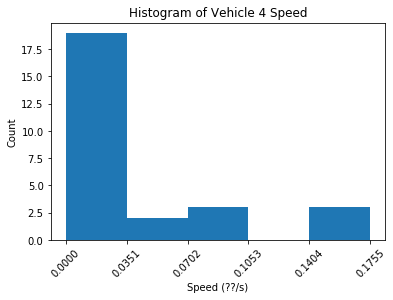

In [21]:
counts, bins, _ = plt.hist(speed_v4, 5)
plt.title("Histogram of Vehicle 4 Speed")
plt.xlabel("Speed (??/s)")
plt.ylabel("Count")
plt.xticks(bins, rotation = 45)
plt.show()

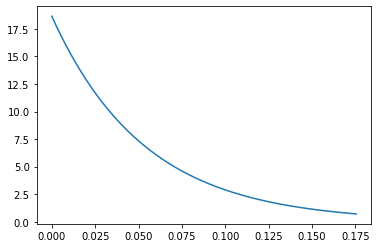

In [22]:
lambd = 1/np.mean(speed_v4)
s = np.linspace(0, 0.1755, 1000)
plt.plot(s, stats.expon.pdf(s, 0, 1/lambd))

In [23]:
mean_stopped = np.mean(speed_v4)
std_stopped = np.std(speed_v4)
mean_stopped

0.05361051972597967

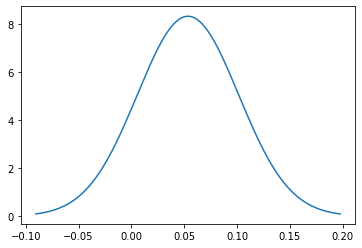

In [24]:
x = np.linspace(-3*std_stopped + mean_stopped, 3*std_stopped + mean_stopped, 1000)
plt.plot(x, stats.norm.pdf(x, mean_stopped, std_stopped))

In [25]:
pos_area = stats.norm.cdf(0.3, mean_stopped, std_stopped) - stats.norm.cdf(0, mean_stopped, std_stopped)
scale = 1/pos_area

In [26]:
scale*stats.norm.cdf(0.3, mean_stopped, std_stopped) - scale*stats.norm.cdf(0, mean_stopped, std_stopped)

1.0

In [32]:
#pdf probability estimates over range
prob_range_norm = np.zeros(len(bins) - 1)
for i in range(len(bins) - 1):
    prob_range_norm[i] = scale*stats.norm.cdf(bins[i+1], mean_stopped, std_stopped) - scale*stats.norm.cdf(bins[i], mean_stopped, std_stopped)
    
prob_range_norm

array([0.25090741, 0.32856096, 0.25812929, 0.12163204, 0.03434479])

In [28]:
counts/np.sum(counts)

array([0.7037037 , 0.07407407, 0.11111111, 0.        , 0.11111111])

In [29]:
#pdf probability estimates over range
prob_range = np.zeros(len(bins) - 1)
for i in range(len(bins) - 1):
    prob_range[i] = stats.expon.cdf(bins[i+1], 0, 1/lambd) - stats.expon.cdf(bins[i], 0, 1/lambd)
    
prob_range

array([0.48032388, 0.24961285, 0.12971784, 0.06741126, 0.03503202])

Now we calculate the conditional probability distrubution for the moving cars

In [94]:
#calculate the speed of ego
speed_ego = vehicleSpeed(x_ego, y_ego)
speed_v1 = vehicleSpeed(x_v1, y_v1)
speed_v6 = vehicleSpeed(x_v6, y_v6)

#calcuate the speeds for the moving cars
speed_v2 = vehicleSpeed(x_v2, y_v2)
speed_v3 = vehicleSpeed(x_v3, y_v3)
speed_v5 = vehicleSpeed(x_v5, y_v5)
speed_moving = np.concatenate((speed_v2, speed_v3, speed_v5))
speed_moving


array([0.03      , 0.03280244, 0.14905033, 0.14866069, 0.42258727,
       0.42177719, 1.15136267, 1.14947814, 0.76972982, 0.76971943,
       0.69318107, 0.6941412 , 1.85884265, 1.85931708, 3.60581586,
       3.60412763, 3.60557014, 6.32998357, 6.33050551, 6.3315859 ,
       6.61003419, 8.44593393, 8.44735911, 8.86080312, 9.5457006 ,
       4.44317769, 4.44166185, 4.44317769, 4.44166185, 0.88448177,
       0.8845903 , 0.88312174, 0.06177378, 0.06082763, 0.06082763,
       0.19070396, 1.16723948, 1.16602744, 1.26627801, 1.26667596,
       0.68844753, 0.68758418, 0.68835456, 0.68683914, 0.19900754,
       0.19723083, 0.19771697, 0.19828263, 0.19859507, 0.19662146,
       0.764     , 0.76044461, 0.76391099, 2.18929121, 2.1878574 ,
       2.18904637, 3.32610102, 0.26681079, 0.06003332, 0.38212563,
       0.53921795, 0.42078973, 0.42169183, 0.2410809 , 0.18164801,
       0.06003332, 0.1183385 , 0.21084592, 0.21084592, 0.02863564,
       0.05403702, 0.02163331, 0.04317407, 0.09501579, 0.05830

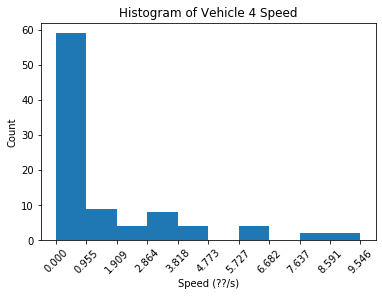

In [31]:
counts_moving, bins_moving, _ = plt.hist(speed_moving, 10)
plt.title("Histogram of Vehicle 4 Speed")
plt.xlabel("Speed (??/s)")
plt.ylabel("Count")
plt.xticks(bins_moving, rotation = 45)
plt.show()

For now we are using a gaussian model as the professor/TA recommended it

In [47]:
mean_moving = np.mean(speed_moving)
std_moving = np.std(speed_moving)
print(mean_moving, std_moving)

1.5799809842770214 2.2653421956155033


In [48]:
pos_area_moving = stats.norm.cdf(10, mean_moving, std_moving) - stats.norm.cdf(0, mean_moving, std_moving)
scale_moving = 1/pos_area_moving
scale_moving

1.3207578892668788

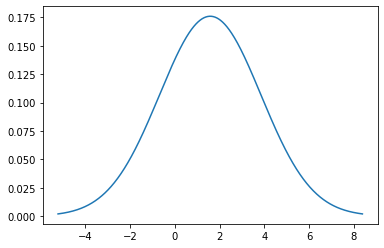

In [49]:
x_moving = np.linspace(-3*std_moving + mean_moving, 3*std_moving + mean_moving, 1000)
plt.plot(x_moving, stats.norm.pdf(x_moving, mean_moving, std_moving))

In [51]:
#pdf probability estimates over range
prob_range_moving = np.zeros(len(bins_moving) - 1)
for i in range(len(bins_moving) - 1):
    prob_range_moving[i] = stats.norm.cdf(bins_moving[i+1], mean_moving, std_moving) - stats.norm.cdf(bins_moving[i], mean_moving, std_moving)
    
prob_range_moving

array([0.148486  , 0.16651973, 0.15677111, 0.12390398, 0.08220887,
       0.04578868, 0.02140879, 0.00840245, 0.0027681 , 0.00076542])

In [37]:
counts_moving/np.sum(counts_moving)

array([0.64130435, 0.09782609, 0.04347826, 0.08695652, 0.04347826,
       0.        , 0.04347826, 0.        , 0.02173913, 0.02173913])

In [65]:
def bayesFilter_step(prevState, speed, model_means, model_stds, epsilon = 1e-9):
    
    p_s_s = 0.6
    p_ns_s = 0.4
    p_s_ns = 0.25
    p_ns_ns = 0.75
    
    pred_bel = np.zeros(len(prevState))
    bel = np.zeros(len(prevState))
    
    
    for state in range(len(prevState)):
        
        if state == 0: 
            #prediction step
            pred_bel[state] = p_s_s*prevState[0] + p_s_ns*prevState[1];
            
            #correction step
            prob_of_meas = stats.norm.cdf(speed + epsilon, model_means[state], model_stds[state]) - stats.norm.cdf(speed - epsilon, model_means[state], model_stds[state])
            bel[state] = prob_of_meas*pred_bel[state]
            
        else: 
            #prediction step
            pred_bel[state] = p_ns_s*prevState[0] + p_ns_ns*prevState[1]
            
            #correction step
            prob_of_meas = stats.norm.cdf(speed + epsilon, model_means[state], model_stds[state]) - stats.norm.cdf(speed - epsilon, model_means[state], model_stds[state])
            bel[state] = prob_of_meas*pred_bel[state]
    
    #normalize the distrubtion
    bel = bel/np.sum(bel)
    
    return bel

In [69]:
def bayesFilter(speeds, model_means, model_stds, initialStates = None, timestep = 0.5, epsilon = 1e-9):
    """
    The time step stays. Go feck yerself
    """
    #assume equal probability if ones are not provided
    if initialStates is None:
        initialStates = np.ones(len(model_means))/len(model_means)
    
    #preallocate the output vector and initialize the prevState
    belief_states = np.zeros([len(speeds), 2])
    prevState = initialStates
    
    for t in range(len(speeds)):
        
        belief_states[t] = bayesFilter_step(prevState, speeds[t], model_means, model_stds, epsilon = epsilon)
        prevState = belief_states[t]
        
    return belief_states

In [70]:
model_means = np.array([mean_stopped, mean_moving])
model_stds = np.array([std_stopped, std_moving])

In [71]:
stateProbs_ego = bayesFilter(speed_ego, model_means, model_stds)                          

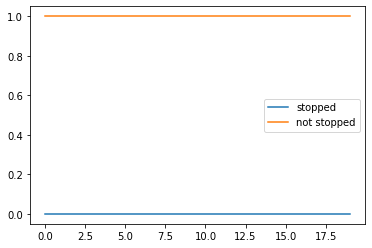

In [85]:
t_ego = np.arange(0, 19.5, 0.5)
plt.plot(t_ego, stateProbs_ego[:, 0])
plt.plot(t_ego, stateProbs_ego[:, 1])
plt.legend(["stopped", "not stopped"])

In [80]:
stateProbs_v4 = bayesFilter(speed_v4, model_means, model_stds)                          

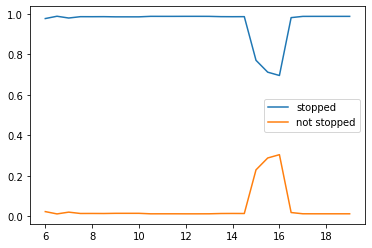

In [86]:
t_v4 = np.arange(6, 19.5, 0.5)
plt.plot(t_v4, stateProbs_v4[:, 0])
plt.plot(t_v4, stateProbs_v4[:, 1])
plt.legend(["stopped", "not stopped"])

In [89]:
stateProbs_v4

array([[0.97677482, 0.02322518],
       [0.98820131, 0.01179869],
       [0.97940969, 0.02059031],
       [0.98604219, 0.01395781],
       [0.98592137, 0.01407863],
       [0.98617165, 0.01382835],
       [0.98528242, 0.01471758],
       [0.98526368, 0.01473632],
       [0.98526328, 0.01473672],
       [0.98771532, 0.01228468],
       [0.98761491, 0.01238509],
       [0.98761313, 0.01238687],
       [0.98775667, 0.01224333],
       [0.98775919, 0.01224081],
       [0.98761569, 0.01238431],
       [0.98620518, 0.01379482],
       [0.98592466, 0.01407534],
       [0.98617172, 0.01382828],
       [0.77052801, 0.22947199],
       [0.71192185, 0.28807815],
       [0.69556792, 0.30443208],
       [0.98138526, 0.01861474],
       [0.98750199, 0.01249801],
       [0.98761112, 0.01238888],
       [0.98761306, 0.01238694],
       [0.98761309, 0.01238691],
       [0.9876131 , 0.0123869 ]])

In [91]:
t_v4[18]

15.0

In [92]:
speed_v4

array([0.06648308, 0.06365532, 0.        , 0.02262742, 0.02126029,
       0.02262742, 0.08772685, 0.08772685, 0.08772685, 0.03394113,
       0.03255764, 0.03255764, 0.03394113, 0.03394113, 0.03255764,
       0.02262742, 0.02126029, 0.02262742, 0.1754537 , 0.1754537 ,
       0.17538529, 0.03255764, 0.03255764, 0.03255764, 0.03255764,
       0.03255764, 0.03255764])

In [97]:
stateProbs_v1 = bayesFilter(speed_v1, model_means, model_stds)
stateProbs_v2 = bayesFilter(speed_v2, model_means, model_stds)                          
stateProbs_v3 = bayesFilter(speed_v3, model_means, model_stds) 
stateProbs_v5 = bayesFilter(speed_v5, model_means, model_stds) 
stateProbs_v6 = bayesFilter(speed_v6, model_means, model_stds) 

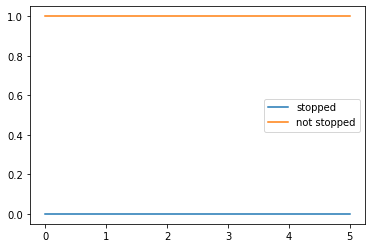

In [98]:
t_v1 = np.arange(0, 5.5, 0.5)
plt.plot(t_v1, stateProbs_v1[:, 0])
plt.plot(t_v1, stateProbs_v1[:, 1])
plt.legend(["stopped", "not stopped"])

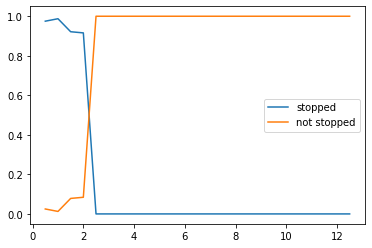

In [99]:
t_v2 = np.arange(0.5, 13, 0.5)
plt.plot(t_v2, stateProbs_v2[:, 0])
plt.plot(t_v2, stateProbs_v2[:, 1])
plt.legend(["stopped", "not stopped"])

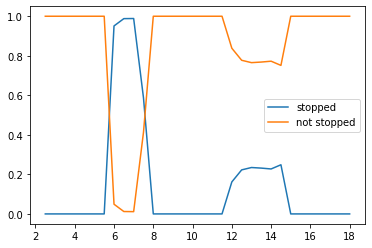

In [100]:
t_v3 = np.arange(2.5, 18.5, 0.5)
plt.plot(t_v3, stateProbs_v3[:, 0])
plt.plot(t_v3, stateProbs_v3[:, 1])
plt.legend(["stopped", "not stopped"])

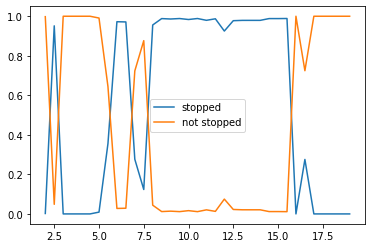

In [101]:
t_v5 = np.arange(2, 19.5, 0.5)
plt.plot(t_v5, stateProbs_v5[:, 0])
plt.plot(t_v5, stateProbs_v5[:, 1])
plt.legend(["stopped", "not stopped"])

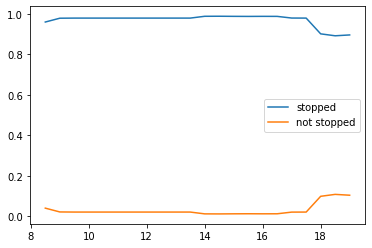

In [103]:
t_v6 = np.arange(8.5, 19.5, 0.5)
plt.plot(t_v6, stateProbs_v6[:, 0])
plt.plot(t_v6, stateProbs_v6[:, 1])
plt.legend(["stopped", "not stopped"])